In [1]:
import pandas as pd
import numpy as np

In [2]:
factor_returns = pd.read_csv('factor_returns_final.csv')

factor_returns['Date'] = pd.to_datetime(factor_returns['Date'])

factor_returns['Mkt'] = factor_returns['Mkt-RF']+factor_returns['RF']

factor_returns.columns

Index(['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'Mom   ', 'Mkt'], dtype='object')

In [3]:
factor_returns

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom,Mkt
0,1990-01-01,-7.85,-1.31,0.85,-1.17,1.35,0.57,-3.27,-7.28
1,1990-02-01,1.11,1.17,0.64,-0.03,-0.66,0.57,-0.55,1.68
2,1990-03-01,1.83,1.62,-2.92,2.04,-1.02,0.64,1.80,2.47
3,1990-04-01,-3.36,-0.33,-2.59,1.78,-0.98,0.69,2.39,-2.67
4,1990-05-01,8.42,-2.35,-3.83,1.57,-1.68,0.68,3.03,9.10
...,...,...,...,...,...,...,...,...,...
380,2021-09-01,-4.37,1.12,5.08,-1.96,2.10,0.00,1.49,-4.37
381,2021-10-01,6.65,-2.70,-0.49,1.66,-1.45,0.00,3.19,6.65
382,2021-11-01,-1.55,-1.77,-0.45,7.20,1.73,0.00,0.88,-1.55
383,2021-12-01,3.10,-0.80,3.26,4.91,4.40,0.01,-2.60,3.11


# Getting the allocations for different algorithms

In [4]:
ridge_reg_wts = pd.read_csv('Ridge_Regression_Weights_Final.csv')
rf_wts = pd.read_csv('Random_Forest_Weights_Final.csv')
xgb_wts = pd.read_csv('XGBoost_Weights_Final.csv')
nn_wts = pd.read_csv('NN_Weights_Final.csv')

In [5]:
ridge_reg_wts = ridge_reg_wts.drop(columns=['Unnamed: 0'])
rf_wts = rf_wts.drop(columns=['Unnamed: 0'])
xgb_wts = xgb_wts.drop(columns=['Unnamed: 0'])
nn_wts = nn_wts.drop(columns=['Unnamed: 0'])

In [6]:
ridge_reg_wts['Date'] = pd.to_datetime(ridge_reg_wts['Date'])
rf_wts['Date'] = pd.to_datetime(rf_wts['Date'])
xgb_wts['Date'] = pd.to_datetime(xgb_wts['Date'])
nn_wts['Date'] = pd.to_datetime(nn_wts['Date'])

In [7]:
returns_df = factor_returns[['Date','SMB','HML','RMW','CMA','Mom   ']]
returns_df['Date'] = pd.to_datetime(returns_df['Date'])
returns_df = returns_df.set_index('Date')

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_22960\3201833036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_df['Date'] = pd.to_datetime(returns_df['Date'])


In [8]:
returns_df

,SMB,HML,RMW,CMA,Mom
Date,,,,,
1990-01-01,-1.31,0.85,-1.17,1.35,-3.27
1990-02-01,1.17,0.64,-0.03,-0.66,-0.55
1990-03-01,1.62,-2.92,2.04,-1.02,1.80
1990-04-01,-0.33,-2.59,1.78,-0.98,2.39
1990-05-01,-2.35,-3.83,1.57,-1.68,3.03
...,...,...,...,...,...
2021-09-01,1.12,5.08,-1.96,2.10,1.49
2021-10-01,-2.70,-0.49,1.66,-1.45,3.19
2021-11-01,-1.77,-0.45,7.20,1.73,0.88


In [9]:
ridge_reg_wts = ridge_reg_wts.set_index('Date').round(2)
ridge_reg_wts.head()

,SMB_Wt,HML_Wt,RMW_Wt,CMA_Wt,Mom _Wt
Date,,,,,
2015-09-01,0.21,0.20,0.14,0.08,0.37
2015-10-01,0.22,0.17,0.19,0.20,0.23
2015-11-01,0.22,0.15,0.14,0.26,0.23
2015-12-01,0.16,0.03,0.23,0.24,0.33
2016-01-01,0.11,0.19,0.19,0.25,0.26


In [10]:
returns_df = returns_df[returns_df.index.isin(ridge_reg_wts.index)]
returns_df.head()

,SMB,HML,RMW,CMA,Mom
Date,,,,,
2015-09-01,-2.79,0.56,1.77,-0.58,5.22
2015-10-01,-2.07,-0.46,0.88,0.52,-3.28
2015-11-01,3.31,-0.42,-2.75,-0.99,2.28
2015-12-01,-2.99,-2.61,0.50,-0.02,3.36
2016-01-01,-3.47,2.09,2.82,3.08,1.44


In [11]:
portfolio_returns_rr = ridge_reg_wts.values * returns_df.values
portfolio_returns_rr_cumprod = pd.DataFrame(portfolio_returns_rr.sum(axis=1),index=returns_df.index,columns=['daily_returns_rr'])

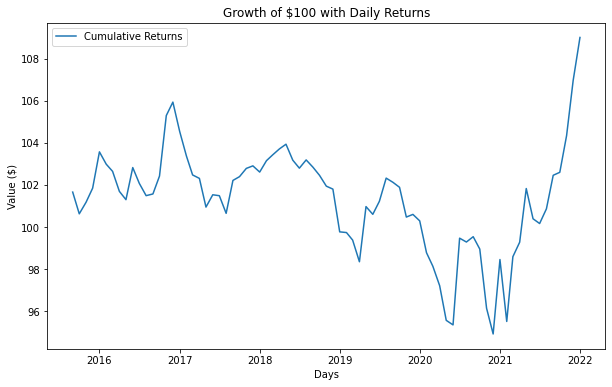

In [12]:
import matplotlib.pyplot as plt

# Calculate the cumulative returns
cumulative_returns = np.cumprod(1 + portfolio_returns_rr_cumprod / 100) * 100

# Plot the growth of $100
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Value ($)')
plt.title('Growth of $100 with Daily Returns')
plt.legend()
plt.show()

In [13]:
cumulative_returns

,daily_returns_rr
Date,
2015-09-01,101.658900
2015-10-01,100.625232
2015-11-01,101.175854
2015-12-01,101.845941
2016-01-01,103.572841
...,...
2021-09-01,102.458923
2021-10-01,102.599907
2021-11-01,104.346465


In [14]:
rf_wts = rf_wts.set_index('Date')
rf_wts.head()

,SMB_Wt,HML_Wt,RMW_Wt,CMA_Wt,Mom _Wt
Date,,,,,
2015-09-01,0.198189,0.233652,0.158639,0.193111,0.216409
2015-10-01,0.178739,0.228123,0.168303,0.192484,0.232351
2015-11-01,0.202226,0.186756,0.177000,0.212229,0.221789
2015-12-01,0.205318,0.152321,0.165762,0.231811,0.244788
2016-01-01,0.202964,0.199462,0.190786,0.194627,0.212161


In [15]:
portfolio_returns_rf = rf_wts.values * returns_df.values
portfolio_returns_rf_cumprod = pd.DataFrame(portfolio_returns_rf.sum(axis=1),index=returns_df.index,columns=['daily_returns_rf'])

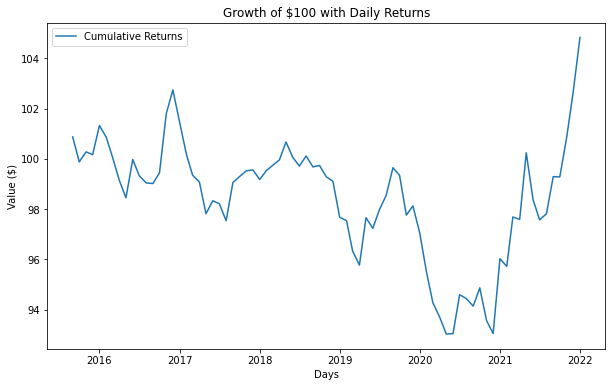

In [16]:
import matplotlib.pyplot as plt

# Calculate the cumulative returns
cumulative_returns1 = np.cumprod(1 + portfolio_returns_rf_cumprod / 100) * 100

# Plot the growth of $100
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns1, label='Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Value ($)')
plt.title('Growth of $100 with Daily Returns')
plt.legend()
plt.show()

In [17]:
cumulative_returns = cumulative_returns.merge(cumulative_returns1,left_index=True,right_index=True)

In [18]:
xgb_wts = xgb_wts.set_index('Date')
xgb_wts.head()

,SMB_Wt,HML_Wt,RMW_Wt,CMA_Wt,Mom _Wt
Date,,,,,
2015-09-01,0.211813,0.225201,0.166149,0.174006,0.209111
2015-10-01,0.198504,0.203535,0.193665,0.210126,0.210043
2015-11-01,0.205172,0.189049,0.163022,0.202739,0.191734
2015-12-01,0.198846,0.166455,0.169659,0.212510,0.214457
2016-01-01,0.221299,0.209699,0.197460,0.181119,0.215755


In [19]:
portfolio_returns_xgb = xgb_wts.values * returns_df.values
portfolio_returns_xgb_cumprod = pd.DataFrame(portfolio_returns_xgb.sum(axis=1),index=returns_df.index,columns=['daily_returns_xgb'])

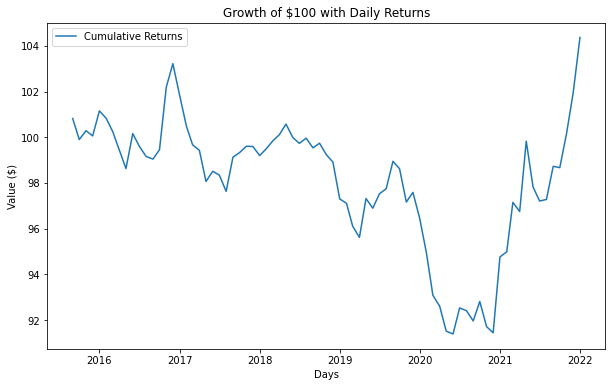

In [20]:
import matplotlib.pyplot as plt

# Calculate the cumulative returns
cumulative_returns2 = np.cumprod(1 + portfolio_returns_xgb_cumprod / 100) * 100

# Plot the growth of $100
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns2, label='Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Value ($)')
plt.title('Growth of $100 with Daily Returns')
plt.legend()
plt.show()

In [21]:
cumulative_returns = cumulative_returns.merge(cumulative_returns2,left_index=True,right_index=True)

In [22]:
cumulative_returns

,daily_returns_rr,daily_returns_rf,daily_returns_xgb
Date,,,
2015-09-01,101.658900,100.876339,100.819875
2015-10-01,100.625232,99.878833,99.898603
2015-11-01,101.175854,100.278102,100.286059
2015-12-01,101.845941,100.167070,100.057565
2016-01-01,103.572841,101.324571,101.153929
...,...,...,...
2021-09-01,102.458923,99.291867,98.726251
2021-10-01,102.599907,99.281594,98.667503
2021-11-01,104.346465,100.833378,100.171725


In [23]:
nn_wts = nn_wts.set_index('Date')
nn_wts.head()

,SMB_Wt,HML_Wt,RMW_Wt,CMA_Wt,Mom _Wt
Date,,,,,
2015-09-01,0.000000,0.118283,0.210442,0.239459,0.431816
2015-10-01,0.468673,0.206922,0.129878,0.100537,0.093990
2015-11-01,0.269326,0.342838,0.042698,0.245261,0.099877
2015-12-01,0.166873,0.078796,0.185563,0.159134,0.409635
2016-01-01,0.068361,0.000000,0.270777,0.267629,0.393234


In [24]:
portfolio_returns_nn = nn_wts.values * returns_df.values
portfolio_returns_nn_cumprod = pd.DataFrame(portfolio_returns_nn.sum(axis=1),index=returns_df.index,columns=['daily_returns_nn'])

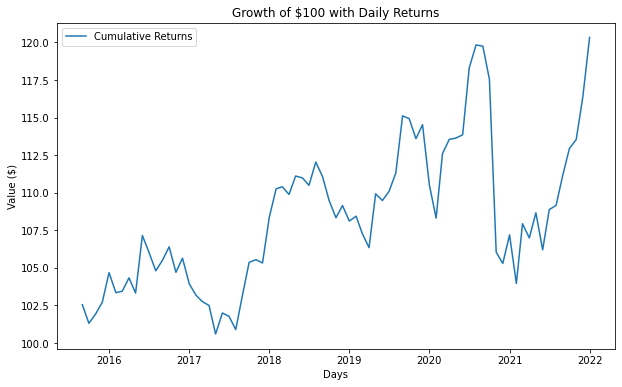

In [25]:
import matplotlib.pyplot as plt

# Calculate the cumulative returns
cumulative_returns3 = np.cumprod(1 + portfolio_returns_nn_cumprod / 100) * 100

# Plot the growth of $100
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns3, label='Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Value ($)')
plt.title('Growth of $100 with Daily Returns')
plt.legend()
plt.show()

In [26]:
cumulative_returns = cumulative_returns.merge(cumulative_returns3,left_index=True,right_index=True)

In [27]:
cumulative_returns

,daily_returns_rr,daily_returns_rf,daily_returns_xgb,daily_returns_nn
Date,,,,
2015-09-01,101.658900,100.876339,100.819875,102.553912
2015-10-01,100.625232,99.878833,99.898603,101.316032
2015-11-01,101.175854,100.278102,100.286059,101.939096
2015-12-01,101.845941,100.167070,100.057565,102.715223
2016-01-01,103.572841,101.324571,101.153929,104.684205
...,...,...,...,...
2021-09-01,102.458923,99.291867,98.726251,111.187684
2021-10-01,102.599907,99.281594,98.667503,112.942030
2021-11-01,104.346465,100.833378,100.171725,113.544036


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Insert a row with values of 100 for each algorithm at the start
start_date = cumulative_returns.index.min() - pd.DateOffset(days=1)
cumulative_returns.loc[start_date] = 100
cumulative_returns

,daily_returns_rr,daily_returns_rf,daily_returns_xgb,daily_returns_nn
Date,,,,
2015-09-01,101.658900,100.876339,100.819875,102.553912
2015-10-01,100.625232,99.878833,99.898603,101.316032
2015-11-01,101.175854,100.278102,100.286059,101.939096
2015-12-01,101.845941,100.167070,100.057565,102.715223
2016-01-01,103.572841,101.324571,101.153929,104.684205
...,...,...,...,...
2021-10-01,102.599907,99.281594,98.667503,112.942030
2021-11-01,104.346465,100.833378,100.171725,113.544036
2021-12-01,106.968483,102.655982,101.938858,116.360041


In [29]:
cumulative_returns = cumulative_returns.rename(columns={'daily_returns_rr':'Ridge Regression Method','daily_returns_rf':'Random Forest Method','daily_returns_xgb':'XGBoost Method','daily_returns_nn':'Neural Networks Method'})

In [38]:
cumulative_returns = cumulative_returns.sort_index(ascending=True)

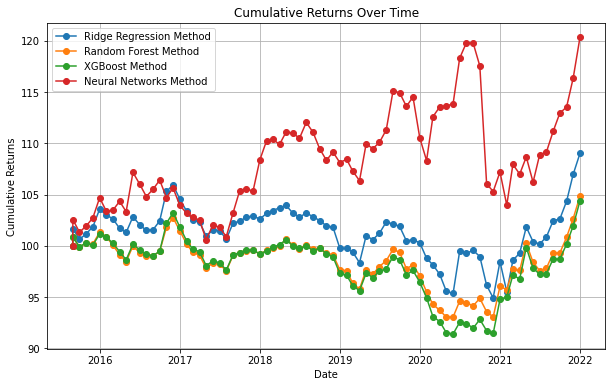

In [39]:
# Plotting cumulative returns over time
plt.figure(figsize=(10, 6))

for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index.values, cumulative_returns[column].values, label=column, marker='o', linestyle='-')

plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()